<a href="https://colab.research.google.com/github/Dain777666/ESAA_25-1/blob/main/YB_5_16_%EC%84%B8%EC%85%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [13]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [15]:
# 데이터 로드
data = pd.read_csv("./abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [16]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [22]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [19]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
y_pred_ridge = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
# 예측된 고리수 → 나이로 변환 (고리수 + 1.5)
y_pred_age_ridge = y_pred_ridge + 1.5

# MSE 및 RMSE 계산
mse_ridge = mean_squared_error(y_test + 1.5, y_pred_age_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Ridge MSE:", mse_ridge)
print("Ridge RMSE:", rmse_ridge)


Ridge MSE: 4.772148639987027
Ridge RMSE: 2.1845248087369087


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [20]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [23]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
avg_rmse_list = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    # 음수 RMSE 값 → 음수 부호를 제거하기 위해 -score 사용
    #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-neg_mse_scores)

    avg_rmse = np.mean(rmse_scores)
    avg_rmse_list.append(avg_rmse)

    print(f"alpha={alpha:.1f} 평균 RMSE: {avg_rmse:.4f}")


alpha=0.0 평균 RMSE: 2.2420
alpha=0.1 평균 RMSE: 2.2282
alpha=1.0 평균 RMSE: 2.2152
alpha=10.0 평균 RMSE: 2.3650
alpha=100.0 평균 RMSE: 2.6364


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [24]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor


4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [25]:
#모델 생성 및 훈련
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

#예측값 구하기
y_pred_xgb = xgb.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_pred_age_xgb = y_pred_xgb + 1.5

#MSE와 RMSE 구하기
mse_xgb = mean_squared_error(y_test + 1.5, y_pred_age_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("XGBRegressor MSE:", mse_xgb)
print("XGBRegressor RMSE:", rmse_xgb)

XGBRegressor MSE: 5.50596895404192
XGBRegressor RMSE: 2.3464801201037098


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

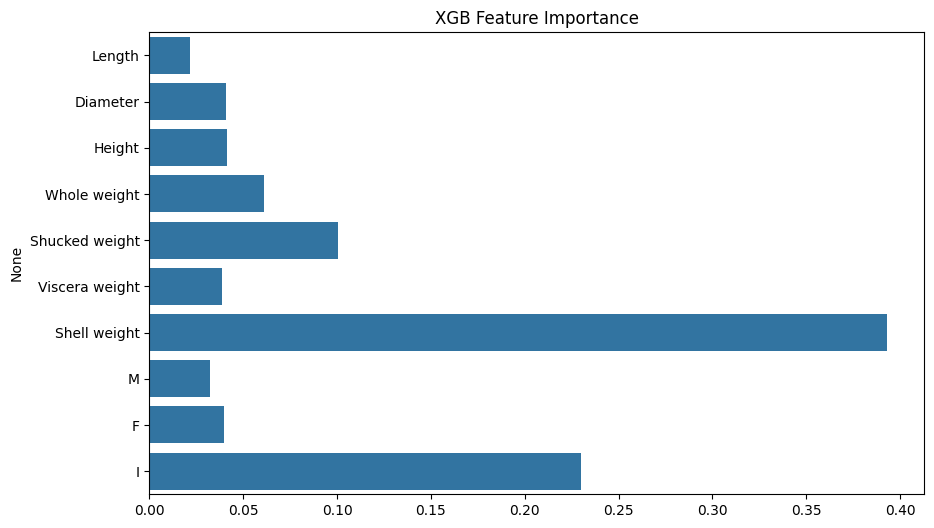

In [26]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb.feature_importances_, y=data.columns)
plt.title("XGB Feature Importance")
plt.show()



---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [1]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [2]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [4]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

print(x_train.shape)
print(y_train.shape)

(124, 13)
(124,)


## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [9]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [10]:
#기울기
print("기울기:", lr.coef_)

기울기: [[-4.96429625e-01  5.36751015e-01  6.77876404e-01 -2.91296922e-01
   7.42132329e-04  1.35721997e-01  1.01362941e+00  1.14729615e-01
  -9.07912129e-02  4.63017606e-02 -2.24580579e-01  5.37034763e-01
   9.21897462e-03]
 [ 6.42193077e-01 -8.67206745e-01 -7.17360532e-01  1.92521278e-01
  -2.48723088e-02  3.95774753e-01 -9.28541506e-02  2.09352651e-01
   5.88471149e-01 -7.45552918e-01  7.51225052e-01  1.55946921e-01
  -7.86336524e-03]
 [-1.45763452e-01  3.30455730e-01  3.94841275e-02  9.87756432e-02
   2.41301765e-02 -5.31496750e-01 -9.20775255e-01 -3.24082266e-01
  -4.97679936e-01  6.99251158e-01 -5.26644473e-01 -6.92981685e-01
  -1.35560939e-03]]


In [11]:
#절편
print("절편:", lr.intercept_)

절편: [-1.07156036  1.44899644 -0.37743608]


3-3) 모델의 정확도를 구하세요.

In [12]:
#모델의 예측값 구하기
lr_pred = lr.predict(x_test)

#모델의 정확도 구하기
accuracy = metrics.accuracy_score(y_test, lr_pred)
print("모델의 정확도:", accuracy)

모델의 정확도: 0.9259259259259259
